In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('search_info.csv')
sample_data = full_data.sample(10)

In [3]:
# Calculate the mean of the prediction 1 from the data sample
sample_mean=full_data['p1_conf'].mean()

In [4]:
sample_mean

0.51561815

In [5]:
# Bootstrapping from the sample set, select 10 sample data each time and simulate for 10000 times.
# And get the mean from the bootstrap 
means=[]
for _ in range(10000):
    bootsample= sample_data.sample(10,replace=True)
    means.append(bootsample.p1_conf.mean())

In [6]:
# Standard deviation from the bootstrapping means
np.std(means)

0.08127178660325195

In [7]:
# Observed mean of prediction one is full_mean=0.5156
# Null hypothesis p1_whole= p1_sample , which the mean of whole prediction 1 is eqalue to the sample data prediction 1. 
# alpha = 5%
# Ho: P1= 0.5156
# H1: P1><0.5156
null_vals=np.random.normal(0.5156,np.std(means),10000)

(array([   6.,   96.,  496., 1544., 2701., 2877., 1631.,  522.,  113.,
          14.]),
 array([0.20538206, 0.26696331, 0.32854456, 0.39012581, 0.45170705,
        0.5132883 , 0.57486955, 0.63645079, 0.69803204, 0.75961329,
        0.82119453]),
 <a list of 10 Patch objects>)

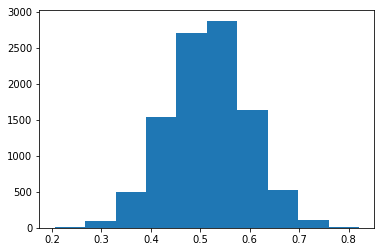

In [9]:
#p_1 distribution from the null
plt.hist(null_vals)

In [10]:
null_vals.mean()

0.5158254364347422

In [14]:
p_value= (null_vals>sample_mean).mean()+(null_vals<sample_mean).mean()

In [15]:
p_value

1.0

In [ ]:
# p_value =1, we fail to reject the null